# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Features explanation

* Popularity: 0 = not popular, 100 = maximum popularity

* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Tempo: The overall estimated tempo of a track in beats per minute (BPM).

* Time signature: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [2]:
good_df = pd.read_csv('good_tracks.csv',index_col=0)

In [3]:
good_df.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,54,1,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,47,1,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,47,1,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,45,1,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,41,1,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [4]:
good_df.describe()

,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,7078.000000,7078.0,7078.000000,7078.000000,7.078000e+03,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000
mean,26.874258,1.0,0.214516,0.482837,2.702935e+05,0.700942,0.321298,5.228031,0.200310,-8.360607,0.643543,0.070738,124.315140,3.870444,0.441662
std,20.536103,0.0,0.330930,0.162201,1.398346e+05,0.269978,0.381941,3.527721,0.166316,5.628453,0.478986,0.060435,29.771917,0.490434,0.248393
min,0.000000,1.0,0.000001,0.000000,4.458000e+03,0.000020,0.000000,0.000000,0.000000,-41.816000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.0,0.001090,0.366000,1.938192e+05,0.562000,0.000036,2.000000,0.096000,-10.045250,0.000000,0.037800,101.573250,4.000000,0.236250
50%,27.000000,1.0,0.023200,0.479000,2.381135e+05,0.796000,0.034400,5.000000,0.129000,-6.510000,1.000000,0.049900,122.977500,4.000000,0.431000
75%,42.000000,1.0,0.291000,0.594750,3.120128e+05,0.914000,0.779750,8.000000,0.272000,-4.658000,1.000000,0.078500,142.991000,4.000000,0.631000
max,87.000000,1.0,0.996000,0.933000,2.025224e+06,0.998000,0.995000,11.000000,0.992000,-0.671000,1.000000,0.884000,220.121000,5.000000,0.984000


In [5]:
good_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'like',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

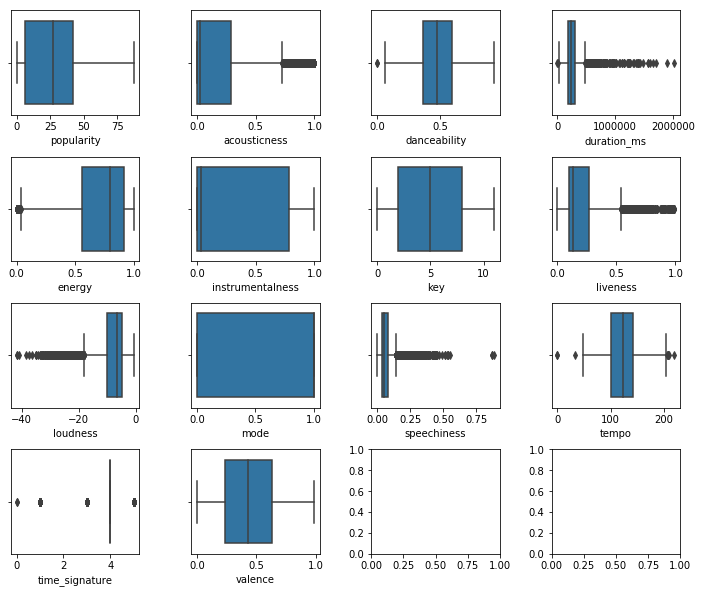

In [6]:
f, ax = plt.subplots(4,4, figsize=(12,10))

cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.boxplot(good_df[cols[i]], ax=col)
            i += 1

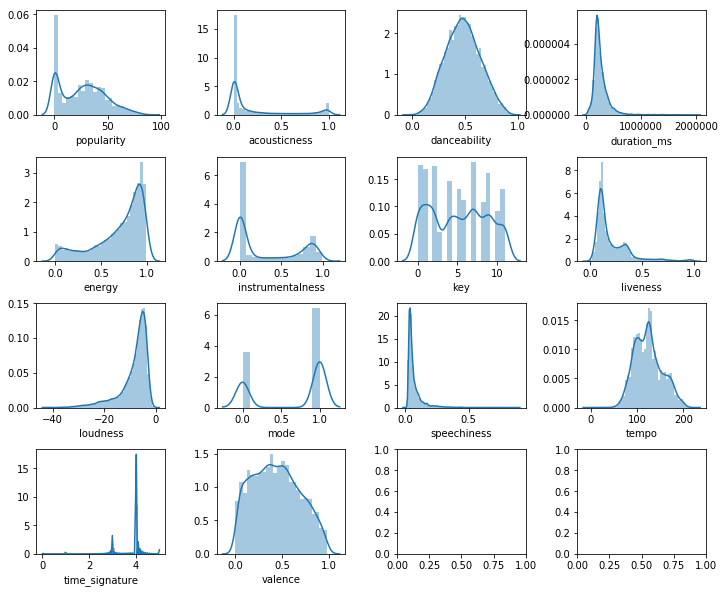

In [8]:
f, ax = plt.subplots(4,4, figsize=(12,10))

cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.distplot(good_df[cols[i]], ax=col)
            i += 1

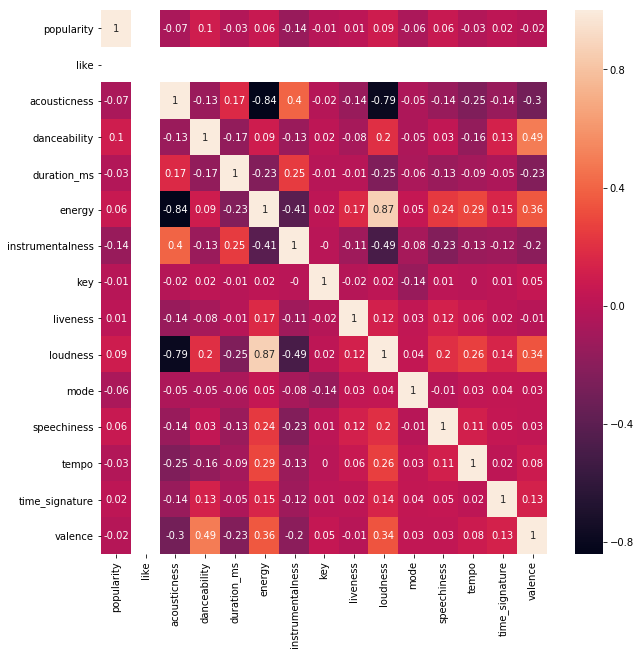

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(round(good_df.corr(),2),annot=True)

In [10]:
bad_df = pd.read_csv('bad_tracks.csv',index_col=0)

In [11]:
bad_df.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Rkomi,Mon Cheri (feat. Sfera Ebbasta),66UkKyxN5YbJl9z7YamQOR,76,0,0.3160,0.887,181867,0.667,0.0,6,0.1190,-5.681,0,0.0484,130.032,4,0.493
1,Priestess,Chef (feat. Madman),4QSLqqTFzsXR8MWfJeI3zq,58,0,0.2770,0.944,176239,0.661,0.0,4,0.2840,-5.643,0,0.0556,133.114,4,0.963
2,Capo Plaza,Billets (feat. Ninho),2aD5ESGyEhXnXdoOsZvsR0,73,0,0.2980,0.732,198537,0.791,0.0,1,0.1750,-5.642,1,0.1910,123.101,4,0.609
3,Sfera Ebbasta,Mademoiselle,2aPnpV1hT7l3eP10uSGK6c,81,0,0.0671,0.794,189344,0.702,0.0,6,0.1550,-5.656,0,0.0346,121.938,4,0.535
4,MamboLosco,BINGO,2fXOb3Dr8di7hbcKFbYNPt,69,0,0.1580,0.796,150444,0.643,0.0,2,0.0561,-5.235,0,0.0354,128.057,4,0.609


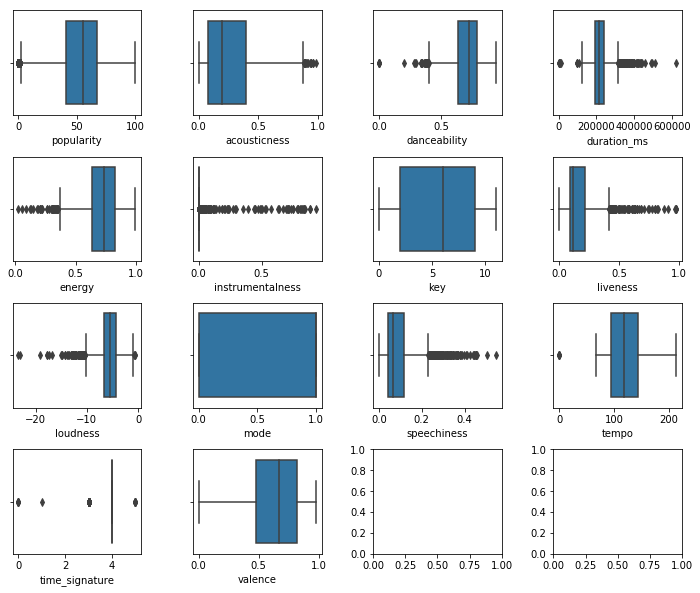

In [12]:
f, ax = plt.subplots(4,4, figsize=(12,10))

cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.boxplot(bad_df[cols[i]], ax=col)
            i += 1

In [13]:
df = pd.concat([good_df,bad_df],axis=0)

In [14]:
df.reset_index().drop('index',axis=1,inplace=True)

In [15]:
df.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,54,1,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,47,1,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,47,1,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,45,1,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,41,1,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_mod = LogisticRegression()

In [18]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'like',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [19]:
X = df[['popularity', 'like',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [20]:
y = df['like']

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
log_mod.fit(X_train,y_train)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
preds_test = log_mod.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
accuracy_score(preds, y_test)

0.8140780413159908

In [32]:
confusion_matrix(preds,y_test)

array([[  23,   12],
       [ 474, 2105]], dtype=int64)

In [34]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.05      0.66      0.09        35
           1       0.99      0.82      0.90      2579

   micro avg       0.81      0.81      0.81      2614
   macro avg       0.52      0.74      0.49      2614
weighted avg       0.98      0.81      0.89      2614



In [36]:
df_class_0 = df[df['like']==0]
df_class_1 = df[df['like']==1]

In [40]:
len(df_class_0), len(df_class_1)

(1633, 7078)

In [43]:
df_class_1_under = df_class_1.sample(len(df_class_0),replace=False)

In [44]:
len(df_class_0), len(df_class_1_under)

(1633, 1633)

In [48]:
df_under = pd.concat([df_class_0,df_class_1_under],axis=0)

In [51]:
X = df_under[['popularity', 'like',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [52]:
y = df_under['like']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
log_mod.fit(X_train,y_train)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
preds_test = log_mod.predict(X_test)

In [58]:
accuracy_score(preds_test, y_test)

0.7683673469387755

In [60]:
confusion_matrix(preds_test,y_test)

array([[392, 112],
       [115, 361]], dtype=int64)

In [61]:
print(classification_report(preds_test,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       504
           1       0.76      0.76      0.76       476

   micro avg       0.77      0.77      0.77       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.77      0.77      0.77       980



In [73]:
import warnings

In [74]:
warnings.filterwarnings('ignore')

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [65]:
from sklearn.model_selection import cross_val_score

In [76]:
cv_tree = cross_val_score(DecisionTreeClassifier(),X_test,y_test,cv=10)
cv_svc = cross_val_score(SVC(),X_test,y_test,cv=10)
cv_forest = cross_val_score(RandomForestClassifier(),X_test,y_test,cv=10)
cv_knn = cross_val_score(KNeighborsClassifier(),X_test,y_test,cv=10)
cv_log = cross_val_score(LogisticRegression(),X_test,y_test,cv=10)

In [77]:
cv_tree

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
cv_knn

array([0.54545455, 0.5959596 , 0.62626263, 0.57142857, 0.6122449 ,
       0.55102041, 0.58163265, 0.56701031, 0.60824742, 0.64948454])

In [79]:
cv_svc

array([0.51515152, 0.51515152, 0.51515152, 0.52040816, 0.52040816,
       0.52040816, 0.52040816, 0.51546392, 0.51546392, 0.51546392])

In [80]:
cv_forest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [81]:
cv_log

array([0.81818182, 1.        , 1.        , 0.7755102 , 0.79591837,
       0.75510204, 0.86734694, 0.78350515, 0.71134021, 1.        ])

In [82]:
forest = RandomForestClassifier()

In [83]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
preds = forest.predict(X_test)

In [87]:
accuracy_score(preds,y_test)

1.0

In [88]:
confusion_matrix(preds,y_test)

array([[507,   0],
       [  0, 473]], dtype=int64)

In [ ]:
# CHECKING BEST PARAMETER COMBINATION FOR KNN classifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Parameters to try
parameter_grid = {'max_features':[1,2,3,4,5],
                  'max_depth':[1,2,3,4,5]}
                  

# Instantiate stratified cross validation
cross_validation = KFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(rf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit model with grid_search
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [90]:
X_test2 = X_test.copy()

In [91]:
X_test2['result'] = preds

In [94]:
test_df = X_test2.reset_index().merge(X.reset_index(), on='index')

In [95]:
test_df

,index,popularity_x,like_x,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature_y,valence_y
0,6863,0,1,0.000870,0.469,105667,0.988,0.001300,3,0.3600,...,0.988,0.001300,3,0.3600,-2.207,1,0.0922,105.128,4,0.5360
1,134,44,0,0.027400,0.800,258949,0.728,0.000000,0,0.3120,...,0.728,0.000000,0,0.3120,-5.806,1,0.0377,122.011,4,0.5570
2,411,94,0,0.753000,0.688,360960,0.620,0.000005,11,0.1580,...,0.620,0.000005,11,0.1580,-8.029,0,0.2200,170.018,4,0.7270
3,411,94,0,0.753000,0.688,360960,0.620,0.000005,11,0.1580,...,0.727,0.000004,5,0.1510,-6.921,0,0.0829,112.468,3,0.6000
4,411,43,1,0.505000,0.639,209684,0.727,0.000004,5,0.1510,...,0.620,0.000005,11,0.1580,-8.029,0,0.2200,170.018,4,0.7270
5,411,43,1,0.505000,0.639,209684,0.727,0.000004,5,0.1510,...,0.727,0.000004,5,0.1510,-6.921,0,0.0829,112.468,3,0.6000
6,203,52,0,0.044500,0.877,240133,0.648,0.000000,11,0.0971,...,0.648,0.000000,11,0.0971,-9.055,0,0.1370,119.992,4,0.8360
7,3834,59,1,0.022300,0.711,226562,0.798,0.000017,2,0.1850,...,0.798,0.000017,2,0.1850,-4.115,0,0.0577,124.967,4,0.6410
8,1377,60,0,0.017000,0.660,230147,0.881,0.000000,9,0.0491,...,0.881,0.000000,9,0.0491,-3.601,0,0.0586,102.965,4,0.6960
9,1377,60,0,0.017000,0.660,230147,0.881,0.000000,9,0.0491,...,0.805,0.647000,8,0.1210,-6.380,1,0.0361,127.961,4,0.8630
